
<center>
    
# Webscrapping Assignment - Yfinance and Webscraping Techniques
</center>    

<hr style="border:1px solid black">
<center>Craig Michie </center>

In [101]:
import yfinance as yf
import json
import pandas as pd
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests
from matplotlib import pyplot as plt 

### Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [51]:
TSLA = yf.Ticker("TSLA")

In [89]:
df = TSLA.history(period="max")
df.reset_index(inplace=True)
df.head(12)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
5,2010-07-07 00:00:00-04:00,1.093333,1.108667,0.998667,1.053333,103825500,0.0,0.0
6,2010-07-08 00:00:00-04:00,1.076000,1.168000,1.038000,1.164000,115671000,0.0,0.0
7,2010-07-09 00:00:00-04:00,1.172000,1.193333,1.103333,1.160000,60759000,0.0,0.0
8,2010-07-12 00:00:00-04:00,1.196667,1.204667,1.133333,1.136667,33037500,0.0,0.0
9,2010-07-13 00:00:00-04:00,1.159333,1.242667,1.126667,1.209333,40201500,0.0,0.0


### Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points


In [54]:
url =  "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data  = requests.get(url).text

soup = BeautifulSoup(data, 'html.parser')

In [69]:
soup.find_all('table')

#soup.find_all("tbody")[0]#annual
#soup.find_all("tbody")[1] #Quarterly

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$7,000</td>
 </tr>
 <tr>
 <td style="text-align:center">2015</td>
 <td style="text-align:center">$4,046</td>
 </tr>
 <tr>
 <td style="text-align:center">2014</td>
 <td style="text-align:center">$3,198</td>
 </tr>
 <tr

In [67]:
'''
Create an empty dataframe 
Acquire new row as a data input
append it to empty dataframe
and repeat
'''

Tsla1 = pd.DataFrame()
for row in soup.find("tbody").find_all('tr'): #only finds the first instance of <tbody> it appears again for the 
    col = row.find_all("td")                  #quartely values 
    date = col[0].text
    Revenue = col[1].text
    
    Tsla1 = pd.concat([Tsla1,pd.DataFrame({"Date":[date], "Revenue":[Revenue]})], ignore_index=True)    

In [72]:
Tsla1.head(13)

,Date,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"
5,2016,"$7,000"
6,2015,"$4,046"
7,2014,"$3,198"
8,2013,"$2,013"
9,2012,$413


In [88]:
'''
using pandas but issue arrises with the headers - 
can be easily hard coded fixed but this is -
worth 1 point so why so much effort
'''

read_html_pandas_data = pd.read_html(url)
read_html_pandas_data = pd.read_html(str(soup))

tsla2 = read_html_pandas_data[0]
tsla2.head()



,Tesla Annual Revenue (Millions of US $),Tesla Annual Revenue (Millions of US $).1
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


### Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [18]:
Game = yf.Ticker("GME")
df1 = Game.history(period="max")
df1.reset_index(inplace=True)
df1.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [93]:
url = ' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
data  = requests.get(url).text
#print(data)
soup = BeautifulSoup(data, 'html.parser')

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

In [95]:
soup.find_all('table')
#soup.find_all("tbody")[0]#annual
#soup.find_all("tbody")[1] #Quarterly

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">GameStop Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$6,466</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$8,285</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$8,547</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$7,965</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$9,364</td>
 </tr>
 <tr>
 <td style="text-align:center">2015</td>
 <td style="text-align:center">$9,296</td>
 </tr>
 <tr>
 <td style="text-align:center">2014</td>
 <td style="text-align:center">$9,040</td>
 </tr>
 <tr>
 <td style="text-align:center">2013</td>
 <td style="text-align:center">$8,887</td>
 </tr>
 <tr>


In [96]:
'''
Create an empty dataframe 
Acquire new row as a data input
append it to empty dataframe
and repeat
'''

Gamer = pd.DataFrame()
for row in soup.find("tbody").find_all('tr'): #only finds the first instance of <tbody> it appears again for the 
    col = row.find_all("td")                  #quartely values 
    date = col[0].text
    Revenue = col[1].text
    
    Gamer = pd.concat([Gamer,pd.DataFrame({"Date":[date], "Revenue":[Revenue]})], ignore_index=True)   

In [118]:
Gamer.head(13) #Annual
Gamer = Gamer.iloc[::-1]
Gamer.head(26)

,Date,Revenue
15,2005,"$1,843"
14,2006,"$3,092"
13,2007,"$5,319"
12,2008,"$7,094"
11,2009,"$8,806"
10,2010,"$9,078"
9,2011,"$9,474"
8,2012,"$9,551"
7,2013,"$8,887"
6,2014,"$9,040"


### Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

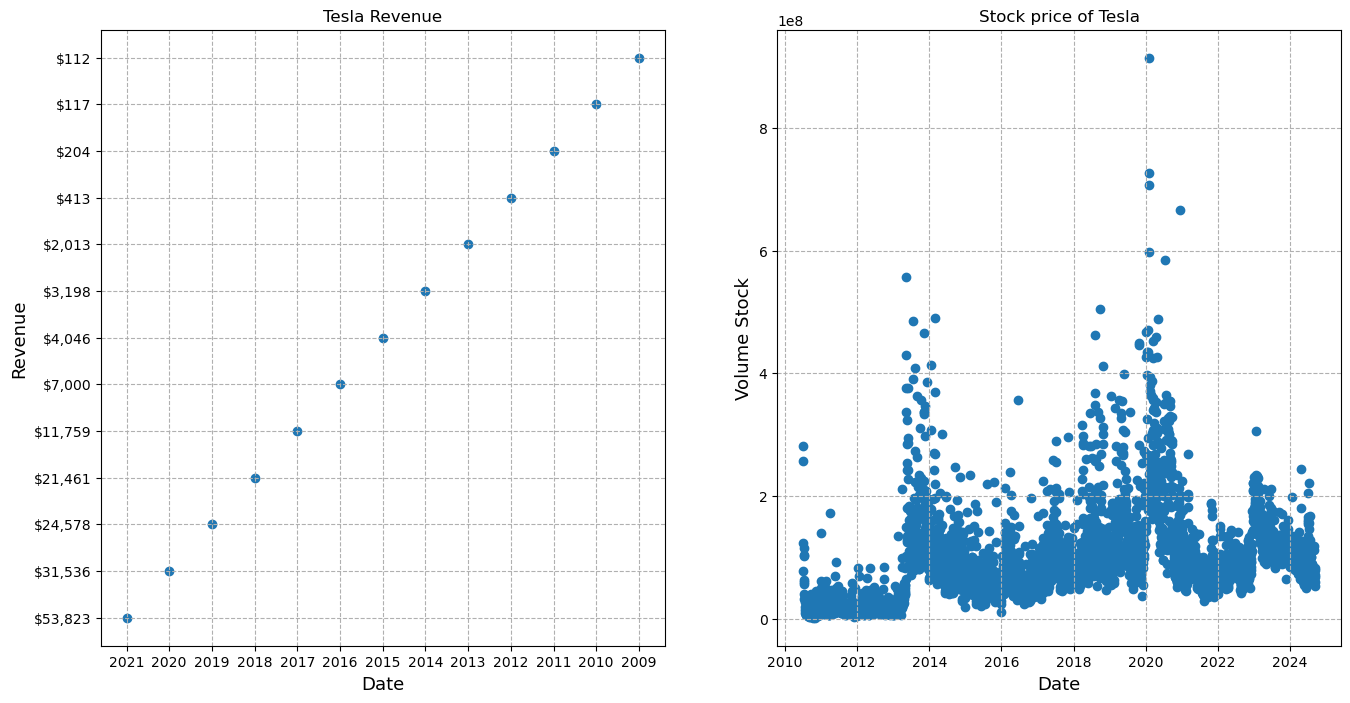

In [123]:
fig, axarr = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
axarr[1].scatter(df['Date'],df['Volume'])
axarr[1].set_xlabel('Date', fontsize=13)
axarr[1].set_ylabel('Volume Stock', fontsize= 13)
axarr[1].set_title('Stock price of Tesla')

axarr[0].scatter(Tsla1['Date'],Tsla1['Revenue'])
axarr[0].set_xlabel('Date', fontsize=13)
axarr[0].set_ylabel('Revenue', fontsize= 13)
axarr[0].set_title('Tesla Revenue')

axarr[0].grid(linestyle='dashed')
axarr[1].grid(linestyle='dashed')

### Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

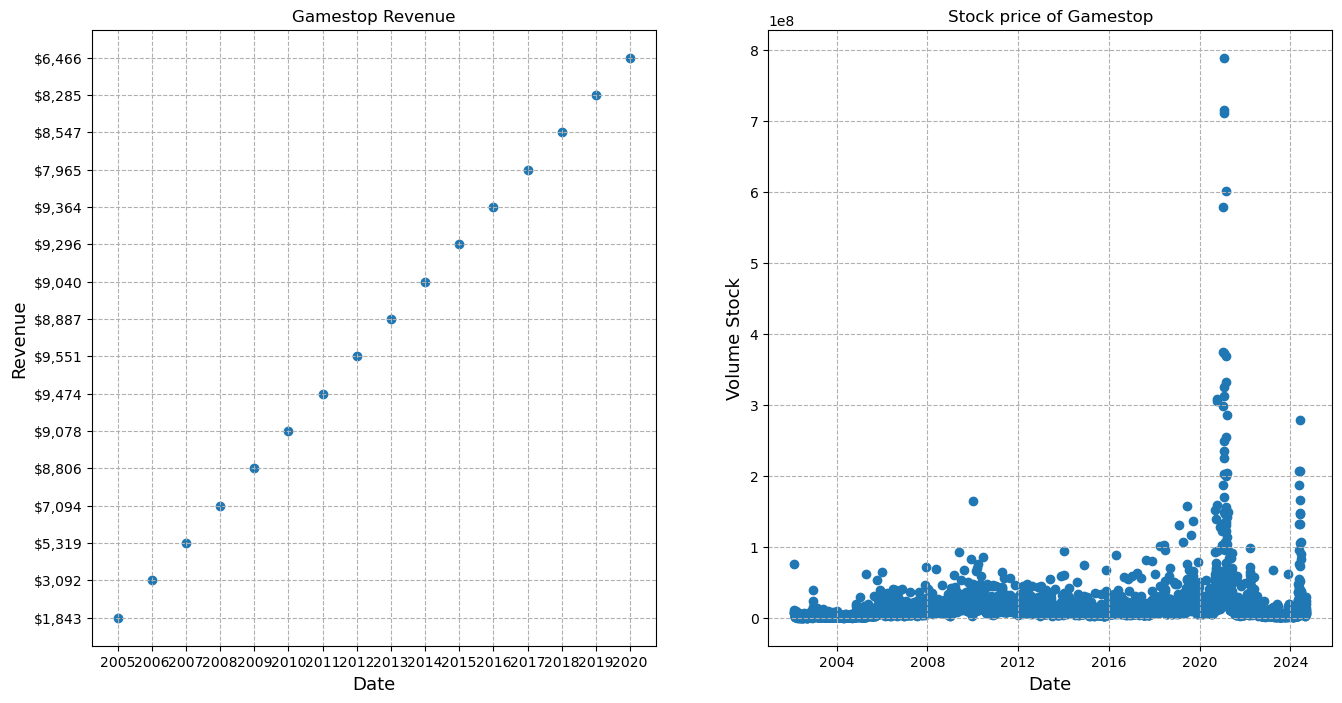

In [124]:
fig, axarr = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
axarr[1].scatter(df1['Date'],df1['Volume'])
axarr[1].set_xlabel('Date', fontsize=13)
axarr[1].set_ylabel('Volume Stock', fontsize= 13)
axarr[1].set_title('Stock price of Gamestop')

axarr[0].scatter(Gamer['Date'],Gamer['Revenue'])
axarr[0].set_xlabel('Date', fontsize=13)
axarr[0].set_ylabel('Revenue', fontsize= 13)
axarr[0].set_title('Gamestop Revenue')

axarr[0].grid(linestyle='dashed')
axarr[1].grid(linestyle='dashed')

### Question 7 - Sharing your Assignment Notebook - 2 Points